In [1]:
# import ROOT as root
import numpy as np
import matplotlib.pyplot as plt

# Reactor neutrino spectrum generator

In this notebook I will write my own code, based on the reactorNuSpectrumGenerator code by schedges (Samuel Hedges), to generate reactor neutrino spectra for a given set of reactor properties

## Constants

In [2]:
GeV = 1
MeV = 1e-3*GeV
keV = 1e-6*GeV
eV = 1e-9*GeV
hbarc = 0.19732698 # GeV fm
speed_of_light = 2.997925e8 # m/s
Gf = 1.166378e-5/GeV**2
electron_charge = 1.60217663e-19 # coulombs
amu = 0.931494

METER = 1e15/hbarc
CENTIMETER = 1e-2*METER
SECOND = speed_of_light*METER
YEAR = 60*60*24*365.25*SECOND
JOULE = eV/electron_charge
GW = 1e9*JOULE/SECOND
KILOGRAM = speed_of_light**2*JOULE
KILOGRAMDAY = KILOGRAM*(60*60*24*SECOND)
CM2S = CENTIMETER**2*SECOND

## Importing fluxes for each fissile isotope

### Fluxes from the fluxData folder

In [3]:
def get_spectrum(filename):
    energies = []
    fluxes = []

    for line in open(filename):
        if not line.startswith("#"):
            line=line.strip("\n")
            lineParts=line.split(",")
            energies.append(float(lineParts[0]))
            fluxes.append(float(lineParts[1]))
    
    return (np.array(energies), np.array(fluxes))

In [12]:
u235_spec = get_spectrum("fluxData/hayes_u235.txt")
u238_spec = get_spectrum("fluxData/hayes_u238.txt")
pu239_spec = get_spectrum("fluxData/hayes_pu239.txt")
pu241_spec = get_spectrum("fluxData/hayes_pu241.txt")

fission_spectra = [u235_spec, u238_spec, pu239_spec, pu241_spec]

Text(0, 0.5, 'Rate (/fission/MeV)')

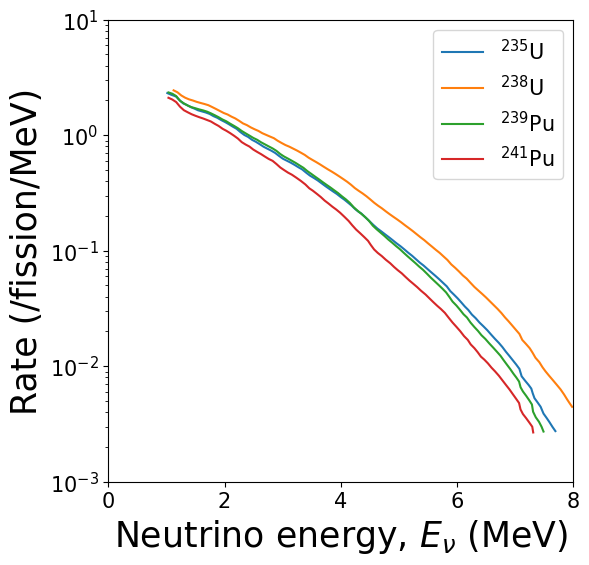

In [13]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(*u235_spec, label="$^{235}$U")
ax.plot(*u238_spec, label="$^{238}$U")
ax.plot(*pu239_spec, label="$^{239}$Pu")
ax.plot(*pu241_spec, label="$^{241}$Pu")

ax.legend(fontsize=15)

ax.set_yscale('log')
ax.set_xlim(0, 8)
ax.set_ylim(1e-3, 1e1)
ax.tick_params(labelsize=15)

ax.set_xlabel(r"Neutrino energy, $E_\nu$ (MeV)", fontsize=25)
ax.set_ylabel("Rate (/fission/MeV)", fontsize=25)

### Importing the flux from 2304.14992

In [52]:
fissileIsotopeSpectraFile = root.TFile('./fluxData/BESTIOLE_2023.root')
fissile_isotopes = ["235U", "238U", "239Pu", "241Pu"]
Enu_min, Enu_max, nbins = 0, 12.5, 500
bin_width = (Enu_max - Enu_min)/nbins
nu_energies = np.arange(bin_width/2, 12.5, bin_width)

In [58]:
fissionSpectra = fissileIsotopeSpectraFile.Get("fission")

fission_spectra = {}

for fissile_isotope in fissile_isotopes:
    fission_spectra[fissile_isotope] = [flux for flux in fissionSpectra.Get(f"{fissile_isotope}_nspec")][1:-1]

Text(0,0.5,'Rate (/fission/MeV)')

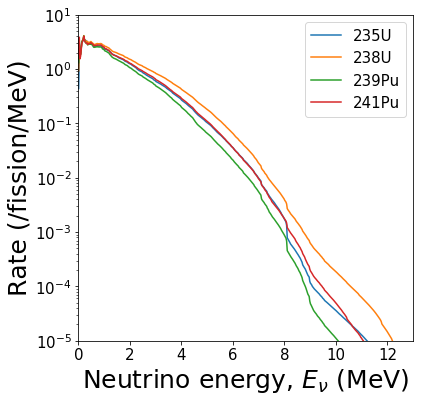

In [63]:
fig, ax = plt.subplots(figsize=(6,6))

for fi in fissile_isotopes:
    ax.plot(nu_energies, fission_spectra[fi], label=fi)

ax.legend(fontsize=15)

ax.set_yscale('log')
ax.set_xlim(0, 13)
ax.set_ylim(1e-5, 1e1)
ax.tick_params(labelsize=15)

ax.set_xlabel(r"Neutrino energy, $E_\nu$ (MeV)", fontsize=25)
ax.set_ylabel("Rate (/fission/MeV)", fontsize=25)

## Making the spectrum

fuel_fractions = 